# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

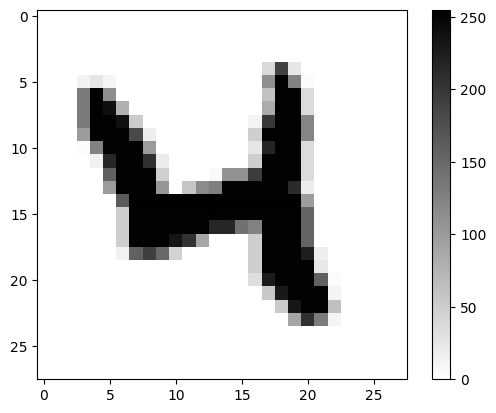

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

In [7]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,
          0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,
          0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,
          0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,
          0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,
          6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116,
        128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253,
        255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252,
        253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252,
        217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,
          0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,
          0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [8]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,   0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,   0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,   6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116, 128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253, 255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,   0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,   0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

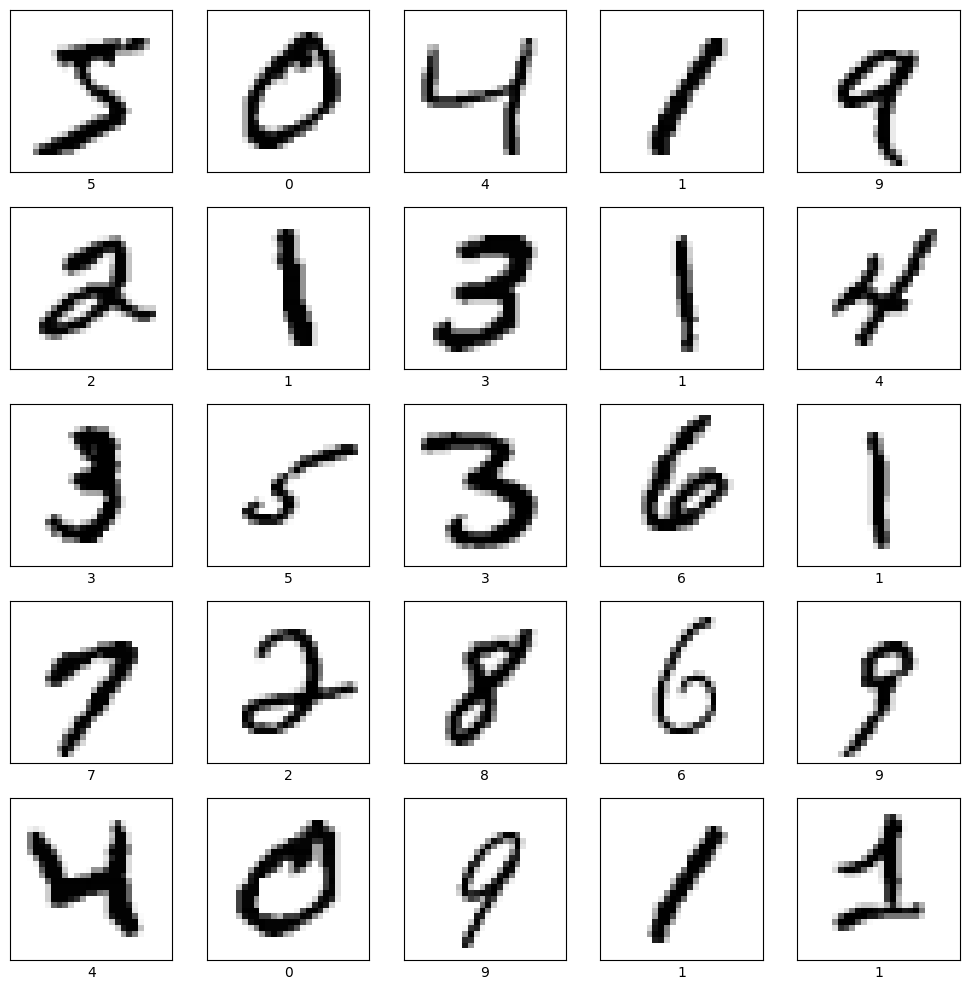

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [10]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [11]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [12]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))


[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [13]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [14]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [15]:
x_train = x_train / 255.
x_val = x_val / 255.

## 4.모델링

In [16]:
nfeatures = x_train.shape[1]
nfeatures

784

In [17]:
clear_session()

model = Sequential([Dense(10, input_shape = (nfeatures,), activation = 'softmax')])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8001 - val_loss: 0.3199
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.3260 - val_loss: 0.2902
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3020 - val_loss: 0.2807
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2907 - val_loss: 0.2714
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2690 - val_loss: 0.2679
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2621 - val_loss: 0.2652
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2612 - val_loss: 0.2654
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2569 - val_loss: 0.2632
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2569 - val_loss: 0.2645
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2611 - val_loss: 0.2611


* 학습결과 그래프

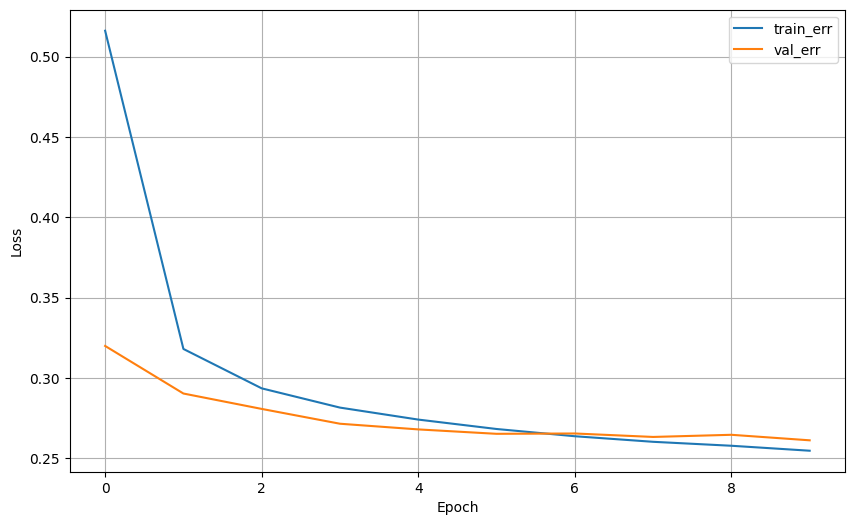

In [19]:
dl_history_plot(history)

* 예측 및 평가

In [20]:
pred = model.predict(x_val)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[9.3790612e-07, 5.1440844e-12, 3.9175397e-06, 5.9565147e-03, 1.3783678e-07, 1.8927110e-05, 7.4544945e-12, 9.9350172e-01, 1.4989105e-05, 5.0275499e-04],
       [1.0530597e-04, 8.7278186e-06, 9.9785310e-01, 3.3682692e-05, 1.0012930e-14, 5.7318655e-04, 1.3859593e-03, 5.6720722e-18, 4.0007275e-05, 1.2358283e-14],
       [2.3320690e-06, 9.7478127e-01, 1.5263026e-02, 2.4664998e-03, 1.6358391e-04, 8.3868939e-04, 8.9664175e-04, 5.3839356e-04, 4.7195456e-03, 3.2999448e-04],
       [9.9982023e-01, 1.9047807e-11, 5.6645687e-05, 1.9721947e-06, 1.7203035e-08, 5.0185350e-05, 4.9157916e-05, 8.3993482e-06, 6.7455589e-06, 6.6164885e-06],
       [4.2112032e-04, 4.0187601e-07, 2.8181544e-03, 3.1295956e-05, 9.6104246e-01, 8.0616985e-05, 1.9503423e-03, 2.0482587e-03, 5.3945235e-03, 2.6212698e-02]], dtype=float32)

In [21]:
pred_1 = pred.argmax(axis=1)
pred_1[:5]

array([7, 2, 1, 0, 4])

In [22]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 964    0    1    2    0    6    4    2    1    0]
 [   0 1112    5    1    0    1    4    2   10    0]
 [   3    8  942   13    6    4   11    8   34    3]
 [   3    0   25  906    0   32    2   12   21    9]
 [   1    1    8    1  906    0    9    5   10   41]
 [   7    3    8   26    5  787    9    8   33    6]
 [  14    3    9    1    6   19  903    1    2    0]
 [   1    6   24    6    4    0    0  948    2   37]
 [   7    7    7   18    7   28    7    9  876    8]
 [  11    7    1    9   17    7    0   14    7  936]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.91      0.91      0.91      1032
           3       0.92      0.90      0.91      1010
           4       0.95      0.92      0.94       982
           5       0.89      0.88      0.89       892
           6       0.95      0.94      0.95       958
           7       0.94      0.92   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [23]:
model2 = Sequential([Input(shape =(nfeatures, )),
                     Dense(512, activation = 'relu'),
                     Dense(256, activation = 'relu'),
                     Dense(128, activation = 'relu'),
                     Dense(32, activation = 'relu'),
                     Dense(10, activation = 'softmax')])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 컴파일, 학습
model2.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy')

result2 = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2491 - val_loss: 0.2610
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2514 - val_loss: 0.2633
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2472 - val_loss: 0.2620
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2428 - val_loss: 0.2643
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2484 - val_loss: 0.2609
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2455 - val_loss: 0.2629
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2390 - val_loss: 0.2603
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2456 - val_loss: 0.2638
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2455 - val_loss: 0.2621
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2365 - val_loss: 0.2615


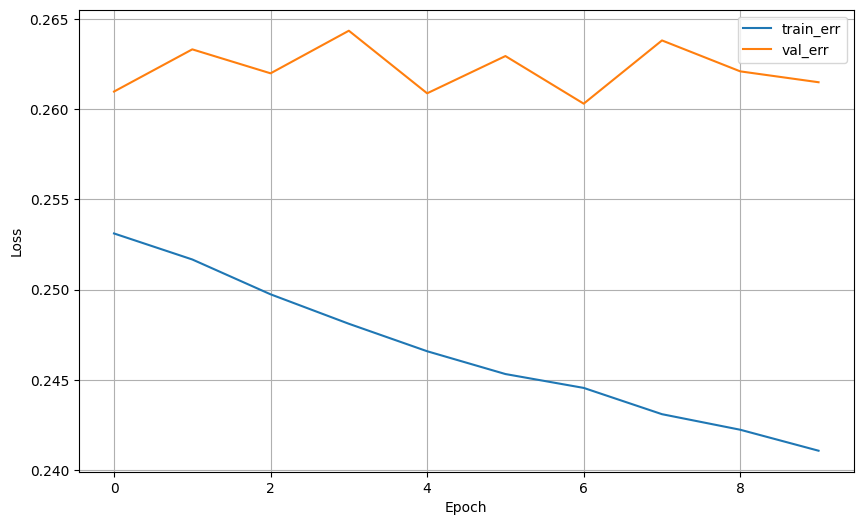

In [25]:
# 학습 곡선
dl_history_plot(result2)

In [26]:
# 예측
pred2 = model2.predict(x_val)
pred2_1 = pred2.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
print(confusion_matrix(y_val, pred2_1))
print(classification_report(y_val, pred2_1))

[[ 18 155   4   0   0  94   2   0   0 707]
 [  0 235   0   0   0  40   2   0   0 858]
 [  2  93   7   0   0  79  31   0   0 820]
 [  2 126   1   0   0  35   0   0   0 846]
 [  0 258   0   0   0 223  11   0   0 490]
 [  9 234   0   0   0 124   4   0   0 521]
 [  4 316   1   0   0 112   4   0   0 521]
 [  2 182   0   0   0 255   2   0   0 587]
 [  2 160   0   0   0 100   0   0   0 712]
 [  6 314   0   0   0 255   1   0   0 433]]
              precision    recall  f1-score   support

           0       0.40      0.02      0.04       980
           1       0.11      0.21      0.15      1135
           2       0.54      0.01      0.01      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.09      0.14      0.11       892
           6       0.07      0.00      0.01       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.07     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### (2) 모델2

In [27]:
model2 = Sequential([Input(shape =(nfeatures, )),
                     Dense(512, activation = 'relu'),
                     Dense(256, activation = 'relu'),
                     Dense(128, activation = 'relu'),
                     Dense(32, activation = 'relu'),
                     Dense(10, activation = 'softmax')])

model2.summary()